In [1]:
import seaborn as sns
import altair as alt
import numpy as np
import polars as pl
import matplotlib as plt

In [2]:
import plotly.express as px

In [3]:
source = pl.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [4]:
custom_params = {"axes.spines.right": False, 
                 "axes.spines.top": False,
                 'font.size': 12.0,
                 'axes.grid': True,
                 'figure.figsize': (9,4)}
sns.set_theme(style="ticks", rc=custom_params, palette="pastel")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

103 ms ± 39.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


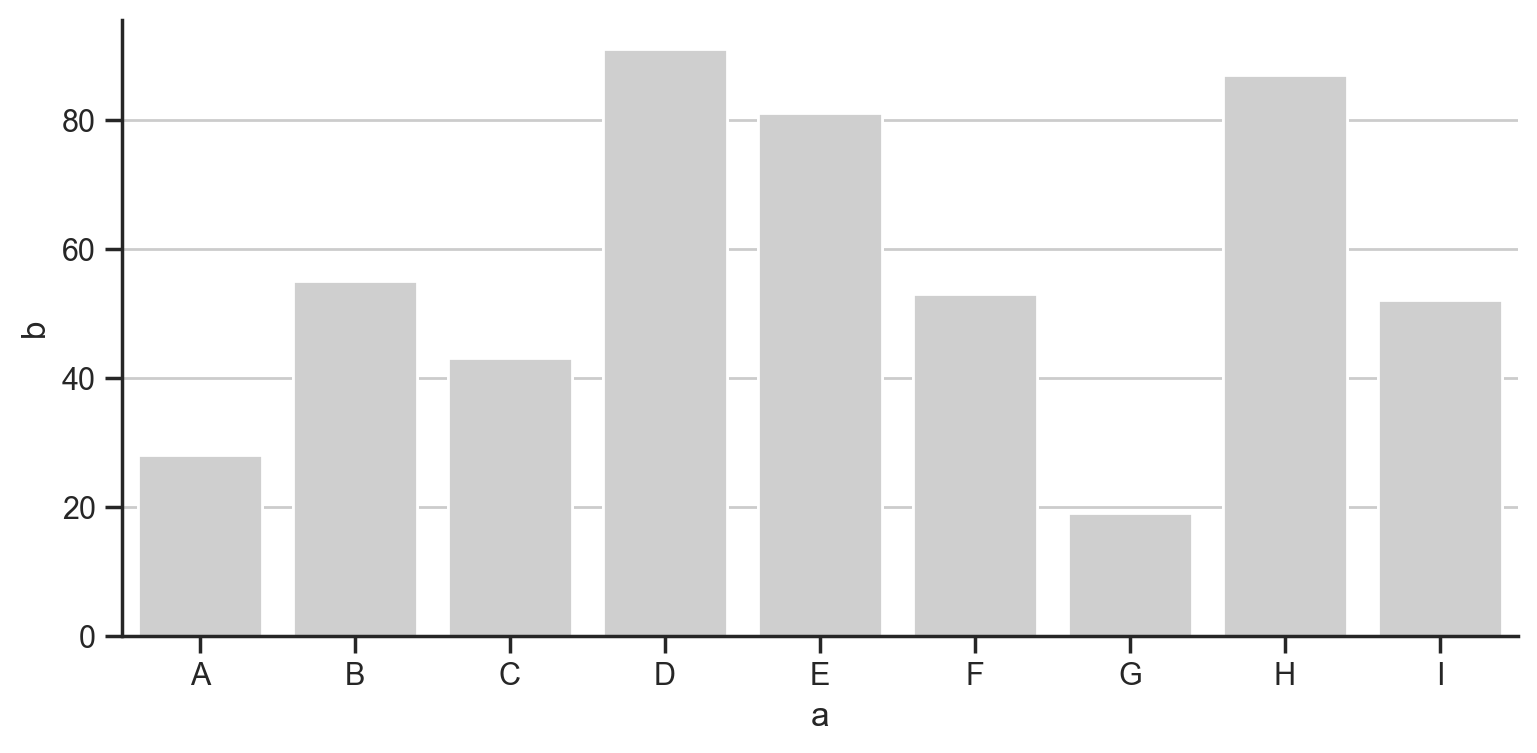

In [13]:
%%timeit
sns.barplot(x=source['a'], y=source['b'])

In [15]:
%%timeit
alt.Chart(source).mark_bar().encode(
    x='a',
    y='b'
)

11.7 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
%%timeit
px.bar(x=source['a'], y=source['b'])

51.7 ms ± 4.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
grocery_lf = pl.scan_csv(source="data/panel-datasets/edible_grocery.csv",
                         has_header=True,
                         separator=",",
                         schema={'panel_id': pl.UInt32,
                                 'trans_id': pl.Int32,
                                 'week': pl.UInt16,
                                 'sku_id': pl.UInt8,
                                 'units': pl.Int16,
                                 'price': pl.Float32,
                                 'brand': pl.Categorical})

sku_lf = pl.scan_csv(source="data/panel-datasets/sku_weight.csv",
                         has_header=True,
                         separator=",",
                         schema={'sku_id': pl.UInt8,
                                 'weight': pl.Int16})